#### Lib Import

In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import urllib
import functions as f
import algorythm as alg
import math
import sklearn

In [26]:
url = "https://pastebin.com/raw/j30qh61S"
#resp = urllib.request.urlopen(url_data)
data1 = pd.read_csv(r'./dataset/Sochi10-11.csv', header=0, sep =',')

In [27]:
data1 = pd.read_csv(r'./dataset/Sochi10-11.csv', header=0, sep =',')
tsmax = data1['ts_ir'].max()
tsmin = data1['ts_ir'].min()
diff_ts = tsmax - tsmin
target_time = diff_ts / 60 * 54.3 + tsmin
query =  data1.loc[((target_time - 8000) <= data1['ts_ir']) & (data1['ts_ir']  <= (target_time + 5000))]
unique = data1['id'].unique()
target_set_avg = f.mean_list(query)

In [28]:
data1.describe()

,id,distance,ts,x,y,w,h,ts_ir,x_ir,y_ir,w_ir,h_ir,temperatureAvg,temperatureSdv,temperatureMin,temperatureMax,temperatureAvgExt,temperatureSdvExt,mappingError,markup
count,1196.000000,1196.000000,1.196000e+03,1196.000000,1196.000000,1196.000000,1196.000000,1.196000e+03,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.0
mean,936.846990,190.537813,1.644577e+12,0.519661,0.496643,0.068173,0.151796,1.644577e+12,0.516511,0.590586,0.137635,0.228615,2954.503885,374.107033,1877.787625,3407.174749,1777.894340,427.058199,0.095528,-1.0
std,95.266457,91.379355,6.433141e+05,0.044277,0.060023,0.016016,0.036138,6.432722e+05,0.087696,0.089461,0.031908,0.053276,601.091461,204.799138,619.221560,470.723016,205.500845,107.670797,0.025048,0.0
min,-1.000000,65.979390,1.644574e+12,0.393750,0.281481,0.018750,0.040741,1.644574e+12,0.268229,0.270833,0.039062,0.062500,0.000000,0.000000,0.000000,0.000000,1327.054000,4.781974,0.002670,-1.0
25%,940.000000,151.351300,1.644577e+12,0.486979,0.488889,0.066667,0.144445,1.644577e+12,0.452474,0.579861,0.132812,0.218750,3053.601000,253.634125,1476.000000,3510.000000,1687.008500,375.956225,0.092545,-1.0
50%,946.000000,164.705900,1.644577e+12,0.535417,0.514815,0.070833,0.159259,1.644577e+12,0.549479,0.618056,0.143229,0.239583,3184.868000,279.223000,2161.000000,3533.000000,1762.398000,426.741550,0.092545,-1.0
75%,955.000000,175.000000,1.644577e+12,0.552083,0.525926,0.077083,0.170370,1.644577e+12,0.580729,0.635417,0.153646,0.256945,3220.208000,430.588225,2349.500000,3552.000000,1829.255250,485.574575,0.116472,-1.0
max,973.000000,622.222800,1.644577e+12,0.643750,0.625926,0.133333,0.359259,1.644577e+12,0.763021,0.784722,0.268229,0.538194,3410.222000,1058.844000,3001.000000,3618.000000,3106.604000,770.852600,0.116472,-1.0


In [29]:


data1 = data1.loc[data1['temperatureAvg'] > 1]
data1 = data1.loc[data1['temperatureSdv'] > 1]
#data1 = data1.loc[data1['temperatureSdv'] < 2000]
data1 = data1.loc[data1['temperatureMax'] > 1]
data1 = data1.loc[data1['temperatureMin'] > 1]
data1 = data1.loc[data1['temperatureAvgExt'] > 1]
data1 = data1.loc[data1['temperatureSdvExt'] > 1]
data1 = data1.loc[data1['id']  > 933]
#data1 = data1.loc[data1['distance']  > 1]
data1 = data1.loc[data1['temperatureAvg'] < 3500]
data1 = data1.loc[data1['temperatureAvg'] > 2400]
#data1 = data1.loc[data1['mappingError'] < 0.1]
#data1 = data1.loc[data1['temperatureSdv'] < 500]
#data1 = data1.loc[data1['ts'] < 1644576965032]

In [30]:
data1.describe()

,id,distance,ts,x,y,w,h,ts_ir,x_ir,y_ir,w_ir,h_ir,temperatureAvg,temperatureSdv,temperatureMin,temperatureMax,temperatureAvgExt,temperatureSdvExt,mappingError,markup
count,981.000000,981.000000,9.810000e+02,981.000000,981.000000,981.000000,981.000000,9.810000e+02,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.0
mean,949.868502,159.971704,1.644577e+12,0.526421,0.518598,0.073775,0.163189,1.644577e+12,0.529917,0.623545,0.148926,0.245724,3156.547148,347.395625,2022.488277,3540.493374,1823.335041,453.034719,0.096465,-1.0
std,8.774967,17.754591,6.732618e+04,0.039575,0.025385,0.008336,0.020807,6.733290e+04,0.078270,0.037002,0.016059,0.029124,130.285456,160.869991,437.494018,29.907429,187.680146,83.373909,0.024072,0.0
min,936.000000,65.979390,1.644577e+12,0.420833,0.374074,0.041667,0.118518,1.644577e+12,0.322917,0.409722,0.083333,0.184028,2494.322000,84.771750,686.000000,3319.000000,1521.521000,241.019300,0.002670,-1.0
25%,944.000000,147.368500,1.644577e+12,0.497917,0.503704,0.068750,0.148148,1.644577e+12,0.476562,0.600694,0.138021,0.225694,3124.559000,254.048900,1543.000000,3526.000000,1718.498000,407.866400,0.092545,-1.0
50%,946.000000,160.000000,1.644577e+12,0.539583,0.518518,0.072917,0.162963,1.644577e+12,0.554688,0.621528,0.145833,0.246528,3198.624000,277.216700,2237.000000,3539.000000,1778.406000,437.841500,0.092545,-1.0
75%,957.000000,169.696900,1.644577e+12,0.554167,0.529630,0.079167,0.174074,1.644577e+12,0.585938,0.642361,0.158854,0.263889,3225.889000,364.645100,2353.000000,3557.000000,1843.842000,495.703200,0.116472,-1.0
max,970.000000,279.999900,1.644577e+12,0.620833,0.625926,0.133333,0.359259,1.644577e+12,0.718750,0.784722,0.268229,0.538194,3410.222000,1014.394000,3001.000000,3618.000000,3106.604000,770.852600,0.116472,-1.0


In [31]:
data1['ts'].unique()

array([1644576702539, 1644576702719, 1644576702916, 1644576703170,
       1644576703363, 1644576703576, 1644576703739, 1644576703931,
       1644576704052, 1644576704314, 1644576704578, 1644576704781,
       1644576704896, 1644576705165, 1644576705348, 1644576705538,
       1644576705735, 1644576705989, 1644576706108, 1644576706367,
       1644576706577, 1644576706745, 1644576706943, 1644576707128,
       1644576707224, 1644576707517, 1644576707791, 1644576707958,
       1644576708074, 1644576708361, 1644576708532, 1644576708730,
       1644576708833, 1644576709192, 1644576709365, 1644576709567,
       1644576709670, 1644576709941, 1644576710146, 1644576710316,
       1644576710590, 1644576710775, 1644576710987, 1644576711155,
       1644576711365, 1644576711536, 1644576711735, 1644576711914,
       1644576712115, 1644576712371, 1644576712581, 1644576712752,
       1644576712956, 1644576713055, 1644576713330, 1644576713593,
       1644576713788, 1644576713902, 1644576714165, 1644576714

Text(0.5, 1.0, 'Температура от времени')

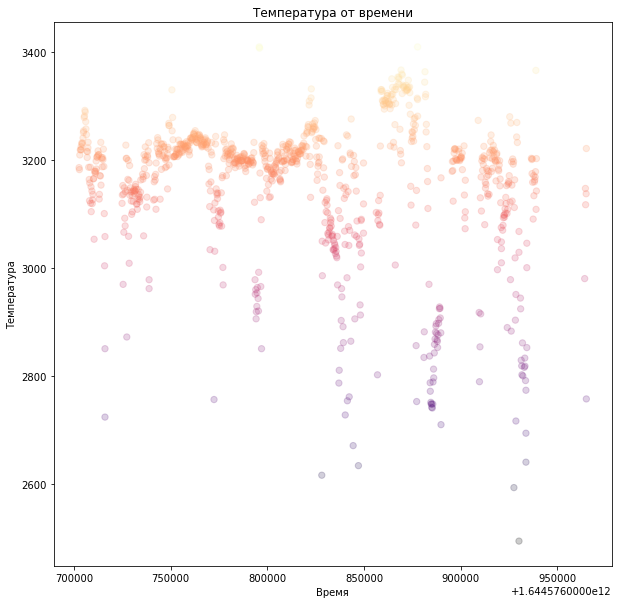

In [32]:
fig = plt.figure(figsize=(10,10))
plot = fig.add_subplot()
plot.scatter(data1['ts'], data1['temperatureAvg'], c = data1['temperatureAvg'], s=40, alpha = 0.2, cmap ='magma')
plot.set_xlabel('Время')
plot.set_ylabel('Температура')

plot.set_title("Температура от времени")

Text(0.5, 0.92, 'Температура от времени и координаты, красный - высокая температура')

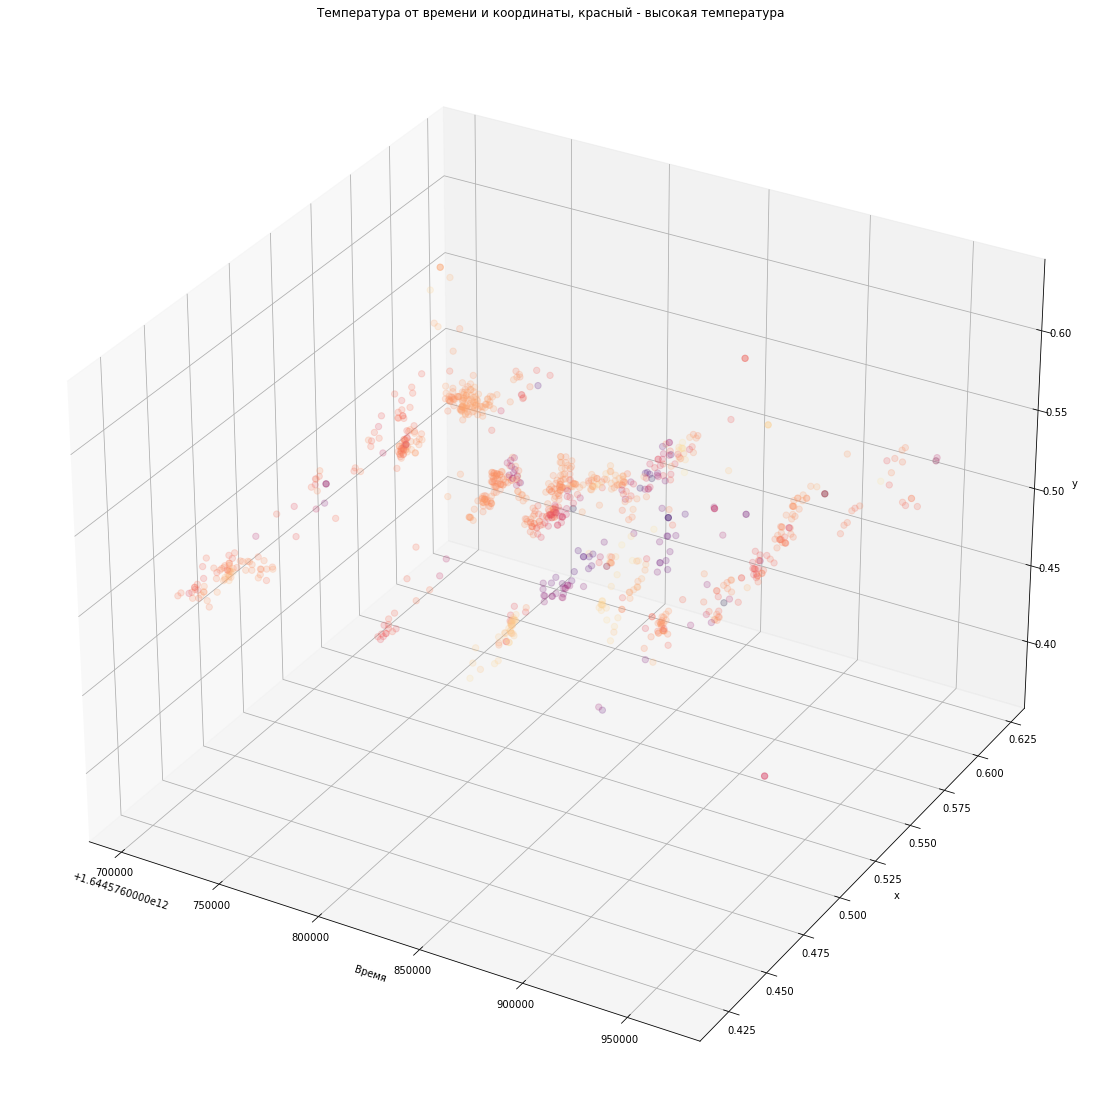

In [33]:
fig = plt.figure(figsize=(20,20))
plot = fig.add_subplot(111, projection='3d')
plot.scatter(data1['ts'], data1['x'], data1['y'], c = data1['temperatureAvg'], s=40, alpha = 0.2, cmap ='magma')
plot.set_xlabel('Время')
plot.set_ylabel('x')
plot.set_zlabel('y')
plot.set_title("Температура от времени и координаты, красный - высокая температура")

In [34]:
main_mean_list = f.mean_list(data1)

In [35]:
algo_set_avg = alg.create_trend(main_mean_list, close_data_size = 10, ratio = 0)

In [36]:
mean_set_avg = alg.create_sdv_trend(main_mean_list, algo_set_avg, close_data_size= 10, ratio=0)

In [37]:
mean_set_avg
border = algo_set_avg + mean_set_avg

Text(0.5, 1.0, 'Скользящая средняя и отклонение на скользящее среднеквадратичное отклонение, в зависимости от id.')

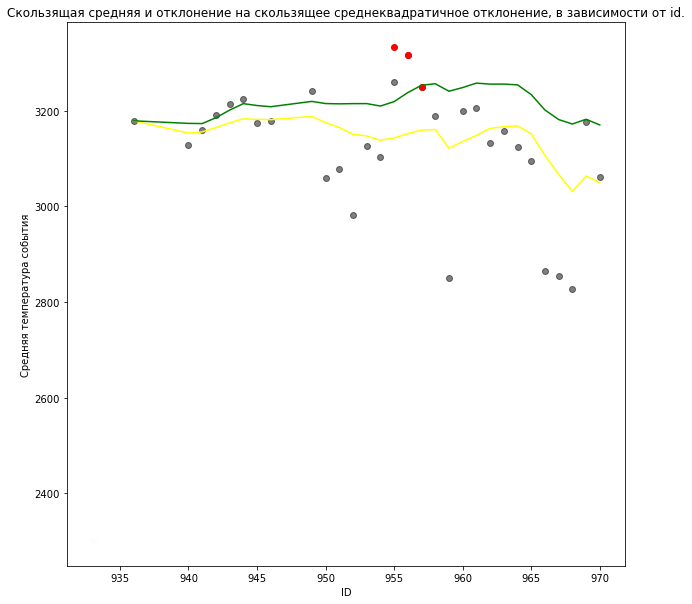

In [38]:
fig = plt.figure(figsize=(10,10))
plot = fig.add_subplot(111)
plot.scatter(data1['id'].unique(),main_mean_list, color = 'black', alpha=0.5)
plt.scatter(933,2300, alpha = 0.01)
plot.plot(data1['id'].unique(), algo_set_avg, color = 'yellow')
plot.plot(data1['id'].unique(), border, color = 'green')
plt.scatter(query['id'].unique(),target_set_avg, color = 'red')
plot.set_xlabel('ID')
plot.set_ylabel('Средняя температура события')
plot.set_title("Скользящая средняя и отклонение на скользящее среднеквадратичное отклонение, в зависимости от id.")